## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  95.203221  1045.952699  0.421253  5.561892  1.440318
1  49.044866   640.460175  0.126913  4.067448  1.098222
2  76.121020   577.428911  0.326470  4.871210  1.278088
3  79.458424   236.395868  0.949051  4.974177  1.150375
4  84.981413  1539.199070  0.175235  5.202271  1.106919


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0483061	total: 72.7ms	remaining: 1m 12s
1:	learn: 1.0382757	total: 73.1ms	remaining: 36.5s
2:	learn: 1.0295189	total: 73.4ms	remaining: 24.4s
3:	learn: 1.0237676	total: 73.8ms	remaining: 18.4s
4:	learn: 1.0166983	total: 74.1ms	remaining: 14.7s
5:	learn: 1.0091071	total: 74.5ms	remaining: 12.3s
6:	learn: 0.9997488	total: 74.9ms	remaining: 10.6s
7:	learn: 0.9911963	total: 75.3ms	remaining: 9.33s
8:	learn: 0.9825979	total: 75.6ms	remaining: 8.33s
9:	learn: 0.9753415	total: 76ms	remaining: 7.52s
10:	learn: 0.9661960	total: 76.3ms	remaining: 6.86s
11:	learn: 0.9585607	total: 76.6ms	remaining: 6.31s
12:	learn: 0.9519792	total: 77.1ms	remaining: 5.85s
13:	learn: 0.9438997	total: 77.5ms	remaining: 5.46s
14:	learn: 0.9354327	total: 77.8ms	remaining: 5.11s
15:	learn: 0.9277942	total: 78.3ms	remaining: 4.82s
16:	learn: 0.9198372	total: 78.7ms	remaining: 4.55s
17:	learn: 0.9124996	total: 79.1ms	remaining: 4.32s
18:	learn: 0.9065980	total: 79.5ms	remaining:

58:	learn: 0.6715422	total: 95ms	remaining: 1.51s
59:	learn: 0.6675692	total: 95.6ms	remaining: 1.5s
60:	learn: 0.6627658	total: 95.9ms	remaining: 1.48s
61:	learn: 0.6582395	total: 96.3ms	remaining: 1.46s
62:	learn: 0.6531827	total: 96.7ms	remaining: 1.44s
63:	learn: 0.6483396	total: 97ms	remaining: 1.42s
64:	learn: 0.6433879	total: 97.5ms	remaining: 1.4s
65:	learn: 0.6381283	total: 97.8ms	remaining: 1.38s
66:	learn: 0.6341990	total: 98.2ms	remaining: 1.37s
67:	learn: 0.6297623	total: 98.6ms	remaining: 1.35s
68:	learn: 0.6258409	total: 98.9ms	remaining: 1.33s
69:	learn: 0.6209793	total: 99.4ms	remaining: 1.32s
70:	learn: 0.6158785	total: 99.7ms	remaining: 1.3s
71:	learn: 0.6118801	total: 100ms	remaining: 1.29s
72:	learn: 0.6070218	total: 100ms	remaining: 1.28s
73:	learn: 0.6026681	total: 101ms	remaining: 1.26s
74:	learn: 0.5986506	total: 101ms	remaining: 1.25s
75:	learn: 0.5943846	total: 102ms	remaining: 1.23s
76:	learn: 0.5911990	total: 102ms	remaining: 1.22s
77:	learn: 0.5871179	tota

272:	learn: 0.2293552	total: 183ms	remaining: 488ms
273:	learn: 0.2284712	total: 184ms	remaining: 487ms
274:	learn: 0.2278556	total: 184ms	remaining: 486ms
275:	learn: 0.2273309	total: 185ms	remaining: 485ms
276:	learn: 0.2267946	total: 185ms	remaining: 483ms
277:	learn: 0.2258185	total: 186ms	remaining: 482ms
278:	learn: 0.2243959	total: 186ms	remaining: 481ms
279:	learn: 0.2239985	total: 186ms	remaining: 480ms
280:	learn: 0.2235854	total: 187ms	remaining: 478ms
281:	learn: 0.2227699	total: 187ms	remaining: 477ms
282:	learn: 0.2213583	total: 188ms	remaining: 475ms
283:	learn: 0.2201755	total: 188ms	remaining: 474ms
284:	learn: 0.2196342	total: 189ms	remaining: 473ms
285:	learn: 0.2190639	total: 189ms	remaining: 472ms
286:	learn: 0.2184727	total: 190ms	remaining: 471ms
287:	learn: 0.2175120	total: 190ms	remaining: 470ms
288:	learn: 0.2169629	total: 191ms	remaining: 469ms
289:	learn: 0.2157950	total: 191ms	remaining: 467ms
290:	learn: 0.2153640	total: 191ms	remaining: 466ms
291:	learn: 

484:	learn: 0.1230310	total: 276ms	remaining: 293ms
485:	learn: 0.1222986	total: 277ms	remaining: 293ms
486:	learn: 0.1222167	total: 277ms	remaining: 292ms
487:	learn: 0.1221358	total: 278ms	remaining: 291ms
488:	learn: 0.1220559	total: 278ms	remaining: 291ms
489:	learn: 0.1213408	total: 279ms	remaining: 290ms
490:	learn: 0.1212460	total: 279ms	remaining: 289ms
491:	learn: 0.1211683	total: 280ms	remaining: 289ms
492:	learn: 0.1210758	total: 280ms	remaining: 288ms
493:	learn: 0.1205853	total: 280ms	remaining: 287ms
494:	learn: 0.1205107	total: 281ms	remaining: 287ms
495:	learn: 0.1199056	total: 281ms	remaining: 286ms
496:	learn: 0.1192146	total: 282ms	remaining: 285ms
497:	learn: 0.1191416	total: 282ms	remaining: 284ms
498:	learn: 0.1190694	total: 283ms	remaining: 284ms
499:	learn: 0.1189982	total: 283ms	remaining: 283ms
500:	learn: 0.1185252	total: 283ms	remaining: 282ms
501:	learn: 0.1184552	total: 284ms	remaining: 282ms
502:	learn: 0.1183862	total: 284ms	remaining: 281ms
503:	learn: 

685:	learn: 0.0751794	total: 365ms	remaining: 167ms
686:	learn: 0.0749594	total: 366ms	remaining: 167ms
687:	learn: 0.0749151	total: 366ms	remaining: 166ms
688:	learn: 0.0746602	total: 367ms	remaining: 166ms
689:	learn: 0.0745957	total: 367ms	remaining: 165ms
690:	learn: 0.0743723	total: 368ms	remaining: 164ms
691:	learn: 0.0741592	total: 368ms	remaining: 164ms
692:	learn: 0.0741164	total: 369ms	remaining: 163ms
693:	learn: 0.0738646	total: 369ms	remaining: 163ms
694:	learn: 0.0738222	total: 370ms	remaining: 162ms
695:	learn: 0.0735190	total: 370ms	remaining: 162ms
696:	learn: 0.0732546	total: 371ms	remaining: 161ms
697:	learn: 0.0731226	total: 371ms	remaining: 161ms
698:	learn: 0.0730813	total: 372ms	remaining: 160ms
699:	learn: 0.0730407	total: 372ms	remaining: 159ms
700:	learn: 0.0727446	total: 372ms	remaining: 159ms
701:	learn: 0.0724878	total: 373ms	remaining: 158ms
702:	learn: 0.0723630	total: 373ms	remaining: 158ms
703:	learn: 0.0723234	total: 373ms	remaining: 157ms
704:	learn: 

901:	learn: 0.0452150	total: 458ms	remaining: 49.8ms
902:	learn: 0.0451810	total: 459ms	remaining: 49.3ms
903:	learn: 0.0451075	total: 459ms	remaining: 48.8ms
904:	learn: 0.0450616	total: 460ms	remaining: 48.2ms
905:	learn: 0.0449811	total: 460ms	remaining: 47.7ms
906:	learn: 0.0448831	total: 460ms	remaining: 47.2ms
907:	learn: 0.0448131	total: 461ms	remaining: 46.7ms
908:	learn: 0.0446556	total: 461ms	remaining: 46.2ms
909:	learn: 0.0445878	total: 462ms	remaining: 45.7ms
910:	learn: 0.0444988	total: 462ms	remaining: 45.2ms
911:	learn: 0.0444132	total: 463ms	remaining: 44.6ms
912:	learn: 0.0443425	total: 463ms	remaining: 44.1ms
913:	learn: 0.0442741	total: 464ms	remaining: 43.6ms
914:	learn: 0.0441906	total: 464ms	remaining: 43.1ms
915:	learn: 0.0441378	total: 464ms	remaining: 42.6ms
916:	learn: 0.0440478	total: 465ms	remaining: 42.1ms
917:	learn: 0.0439786	total: 466ms	remaining: 41.6ms
918:	learn: 0.0437322	total: 467ms	remaining: 41.1ms
919:	learn: 0.0434905	total: 467ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

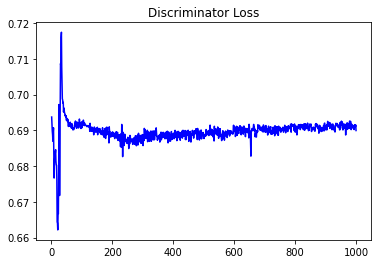

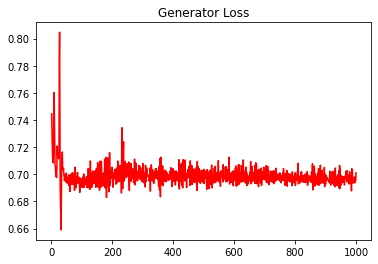

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21139820478425503


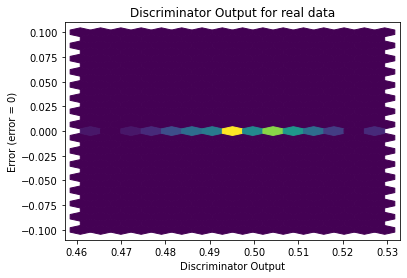

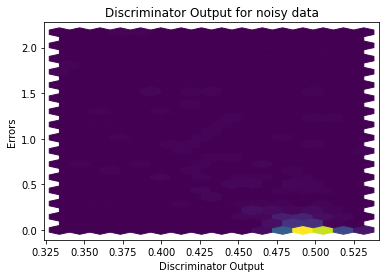

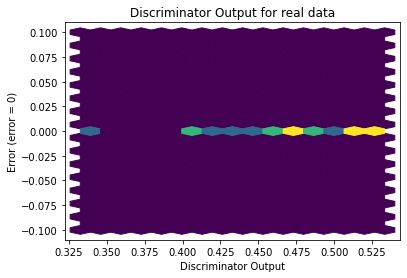

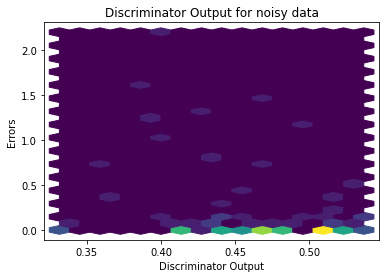

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


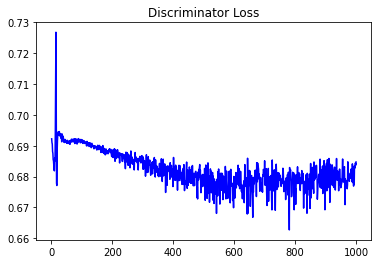

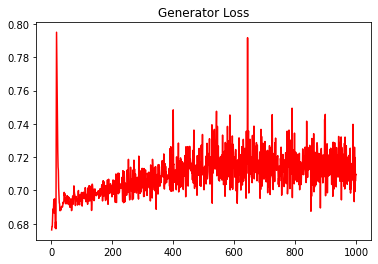

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.19839702973642576


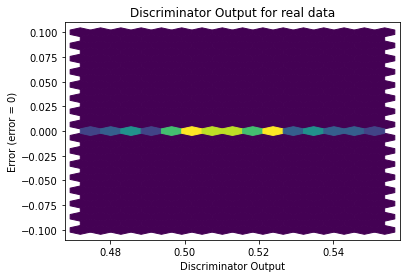

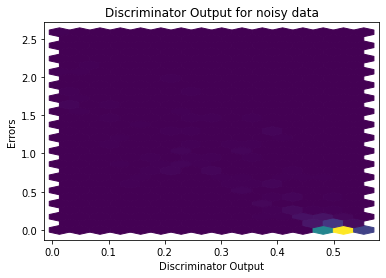

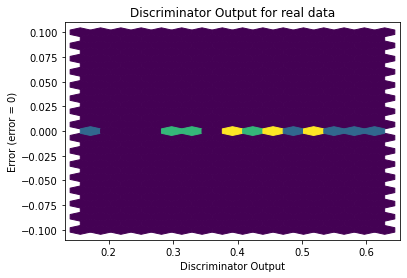

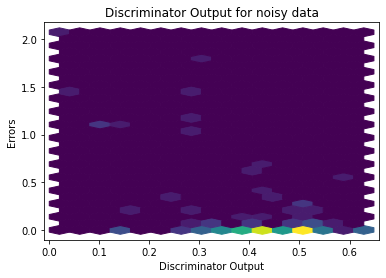

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8154]], requires_grad=True)
